In [190]:
# import libraries
import pandas as pd
import numpy as np
import yfinance as yf
from pandas_datareader import data as pdr
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from datetime import datetime
import matplotlib.pyplot as plt
yf.pdr_override()

In [191]:
# set inputs
start = datetime(2022,6,1)
end = datetime(2023,1,1)
tickers = ['BTC-USD', 'ETH-USD', 'BNB-USD']

In [192]:
# donwnload data
df = pdr.get_data_yahoo(tickers,start,end,interval='1d')['Close']

[*********************100%***********************]  3 of 3 completed


In [193]:
# show few entries
df.head()

,BNB-USD,BTC-USD,ETH-USD
Date,,,
2022-06-01 00:00:00+00:00,300.504059,29799.080078,1823.569336
2022-06-02 00:00:00+00:00,308.101776,30467.488281,1834.150513
2022-06-03 00:00:00+00:00,298.397888,29704.390625,1775.078613
2022-06-04 00:00:00+00:00,301.631134,29832.914062,1801.609497
2022-06-05 00:00:00+00:00,298.934723,29906.662109,1805.204956


<AxesSubplot: >

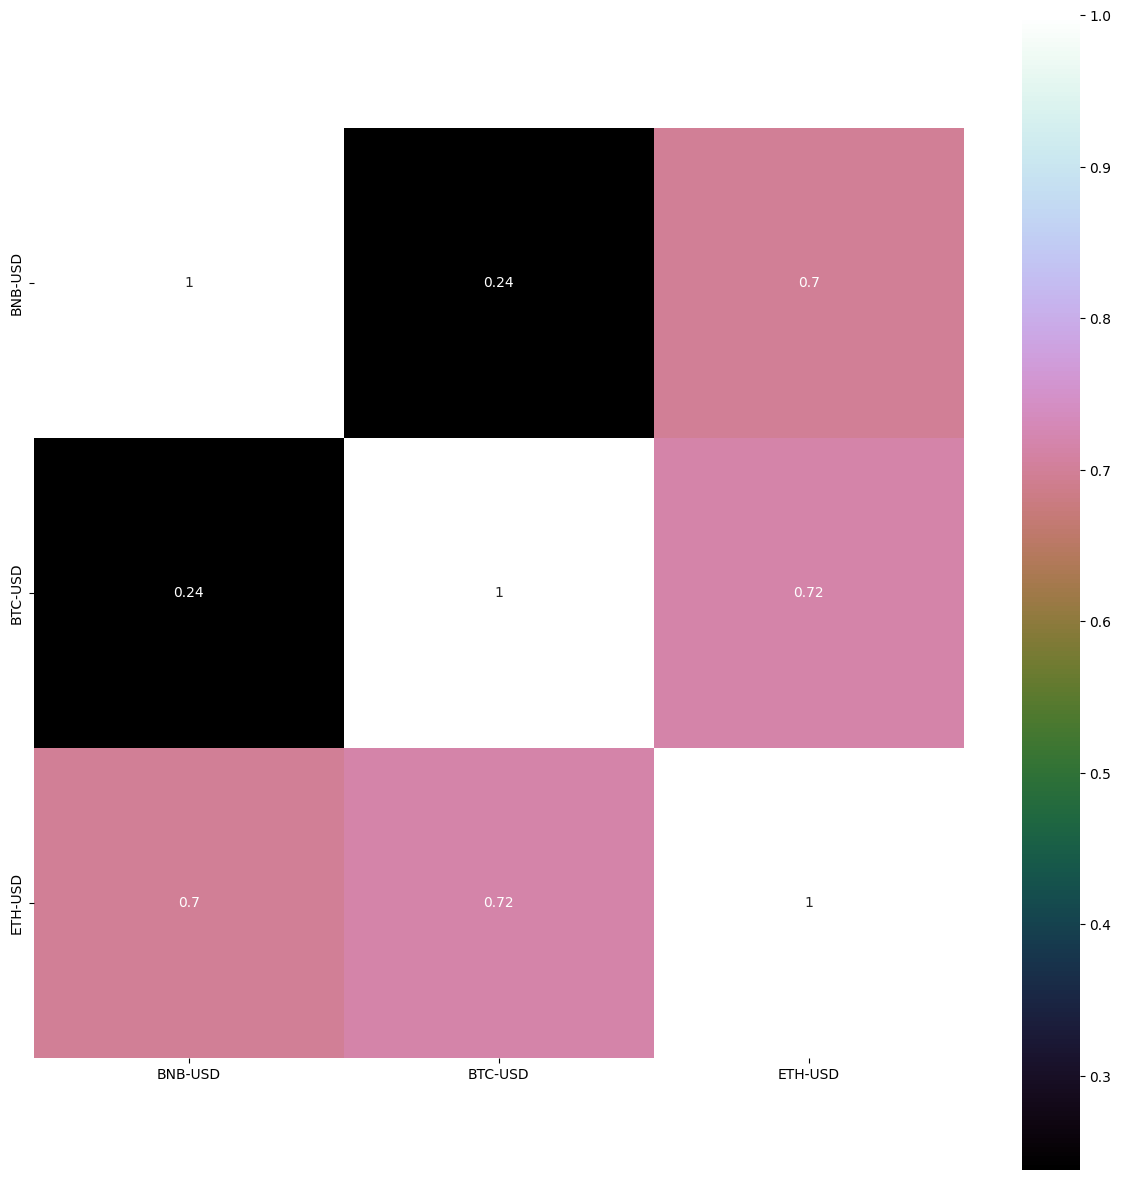

In [194]:
# show correlation between the assets
correlation = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True, annot = True, cmap='cubehelix')

In [195]:
# check for na values
df.isnull().values.any()

False

In [196]:
# find assets returns
rets=df.pct_change()
rets

,BNB-USD,BTC-USD,ETH-USD
Date,,,
2022-06-01 00:00:00+00:00,NaN,NaN,NaN
2022-06-02 00:00:00+00:00,0.025283,0.022430,0.005802
2022-06-03 00:00:00+00:00,-0.031496,-0.025046,-0.032207
2022-06-04 00:00:00+00:00,0.010835,0.004327,0.014946
2022-06-05 00:00:00+00:00,-0.008939,0.002472,0.001996
...,...,...,...
2022-12-27 00:00:00+00:00,0.009821,-0.011976,-0.011559
2022-12-28 00:00:00+00:00,-0.009955,-0.009846,-0.018804
2022-12-29 00:00:00+00:00,0.009576,0.005423,0.009756


In [197]:
# scale data, prepare for eigen decomposition
scaler= StandardScaler().fit(rets)
rets_scal = pd.DataFrame(scaler.fit_transform(rets), columns = rets.columns, index = rets.index)
rets_scal.dropna(how='any', inplace = True)
rets_scal.head()

,BNB-USD,BTC-USD,ETH-USD
Date,,,
2022-06-02 00:00:00+00:00,0.715772,0.773421,0.139877
2022-06-03 00:00:00+00:00,-0.873773,-0.715151,-0.660626
2022-06-04 00:00:00+00:00,0.311299,0.205802,0.332455
2022-06-05 00:00:00+00:00,-0.242302,0.147650,0.059704
2022-06-06 00:00:00+00:00,-0.323440,1.604987,0.648664


In [198]:
# run POCA
pca = PCA()
PrincipalComponent = pca.fit(rets_scal)

In [199]:
# check the result
components_[2]

array([-0.0081975 ,  0.71079588, -0.70335057])

In [203]:
# get weights
def PCWeights():
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i]/sum(pca.components_[i])

    weights = weights.values.T
    return weights

weights = PCWeights()
weights[0]

array([0.32593512, 0.33714738, 0.3369175 ])

Sum of weights of current eigen-portfolio: 100.00


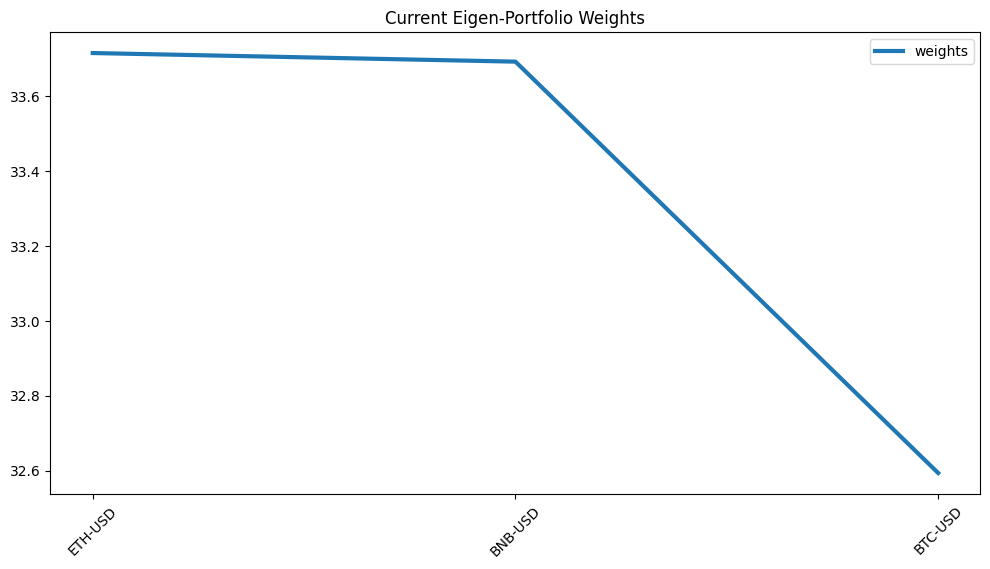

,weights
ETH-USD,33.714738
BNB-USD,33.691750
BTC-USD,32.593512


In [214]:
# create visual presentation for eigen portfolio weights
portfolio  = pd.DataFrame()
def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'weights': weights.squeeze()*100}, index = tickers)
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    if plot:
        print('Sum of weights of current eigen-portfolio: %.2f' % np.sum(portfolio))
        portfolio.plot(title='Current Eigen-Portfolio Weights',
            figsize=(12,6),
            xticks=range(0, len(tickers),1),
            rot=45,
            linewidth=3)
        plt.show()

    return portfolio
plotEigen(weights=weights[0], plot=True,)